### **Overview**

Throughout this assignment, you will be performing specific well-defined tasks that’ll strengthen your concepts in Explainable AI. We will be using the Breast Cancer Dataset and here is a brief context about the same:

Breast cancer is a type of cancer that starts in the breast. Cancer starts when cells begin to grow out of control. Breast cancer cells usually form a tumor that can often be seen on an x-ray or felt as a lump. Breast cancer occurs almost entirely in women, but men can get breast cancer, too.
A benign tumor is a tumor that does not invade its surrounding tissue or spread around the body. A malignant tumor is a tumor that may invade its surrounding tissue or spread around the body.

As part of the assignment, you will have to accomplish the below tasks.

**Author:** Ayoub Berdeddouch

###**Dataset**

Dataset Link: https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv

**About the dataset:**

Different features related to the breast are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.


* id: Id number
* agnosis: Cancer is Malignant or Benign (M = malignant, B = benign) - target variable

Other 20 features contain information about following 10 real valued features

* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness (perimeter^2 / area - 1.0) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry  
* fractal dimension ("coastline approximation" - 1)

# Task 1

## Import Necessary Libraries

In [24]:
!pip install shap
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import shap

# load JS visualization code to notebook. Without this, the SHAP plots won't be displayed
shap.initjs()

## Load the data
Display the first 5 rows of the data after loading.

In [25]:
url="https://raw.githubusercontent.com/dphi-official/Datasets/master/breast_cancer/Training_set_breastcancer.csv"
data = pd.read_csv(url,sep=",")
#Dropping the id because it does not affect out analysis
display(data.head(5))
data = data.drop('id', axis=1)
X = data.drop("diagnosis",axis=1)
#Label encoder change B and M for 0 and 1 respectively
y=data.diagnosis.map({'B':0, 'M':1}).astype(np.int)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    914102        13.16         20.54           84.06      538.7   
1     91858        11.75         17.56           75.89      422.9   
2  88466802        10.65         25.22           68.01      347.0   
3   9111843        12.00         28.23           76.77      442.5   
4  84862001        16.13         20.68          108.10      798.8   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.07335           0.05275         0.01800              0.01256   
1          0.10730           0.09713         0.05282              0.04440   
2          0.09657           0.07234         0.02379              0.01615   
3          0.08437           0.06450         0.04055              0.01945   
4          0.11700           0.20220         0.17220              0.10280   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.1713  ...          28.46            95.29       648.3   
1         0.1598  ...          27.98            88.52       552.3   
2         0.1897  ...          35.19            77.98       455.7   
3         0.1615  ...          37.88            85.07       523.7   
4         0.2164  ...          31.48           136.80      1315.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1118             0.1646          0.07698               0.04195   
1            0.1349             0.1854          0.13660               0.10100   
2            0.1499             0.1398          0.11250               0.06136   
3            0.1208             0.1856          0.18110               0.07116   
4            0.1789             0.4233          0.47840               0.20730   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0          0.2687                  0.07429          B  
1          0.2478                  0.07757          B  
2          0.3409                  0.08147          B  
3          0.2447                  0.08194          B  
4          0.3706                  0.11420          M  

[5 rows x 32 columns]

## Perform Basic Exploratory Data Analysis (EDA)

Shape of data:  (398, 31)
Data type of columns and missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              398 non-null    float64
 1   texture_mean             398 non-null    float64
 2   perimeter_mean           398 non-null    float64
 3   area_mean                398 non-null    float64
 4   smoothness_mean          398 non-null    float64
 5   compactness_mean         398 non-null    float64
 6   concavity_mean           398 non-null    float64
 7   concave points_mean      398 non-null    float64
 8   symmetry_mean            398 non-null    float64
 9   fractal_dimension_mean   398 non-null    float64
 10  radius_se                398 non-null    float64
 11  texture_se               398 non-null    float64
 12  perimeter_se             398 non-null    float64
 13  area_se       

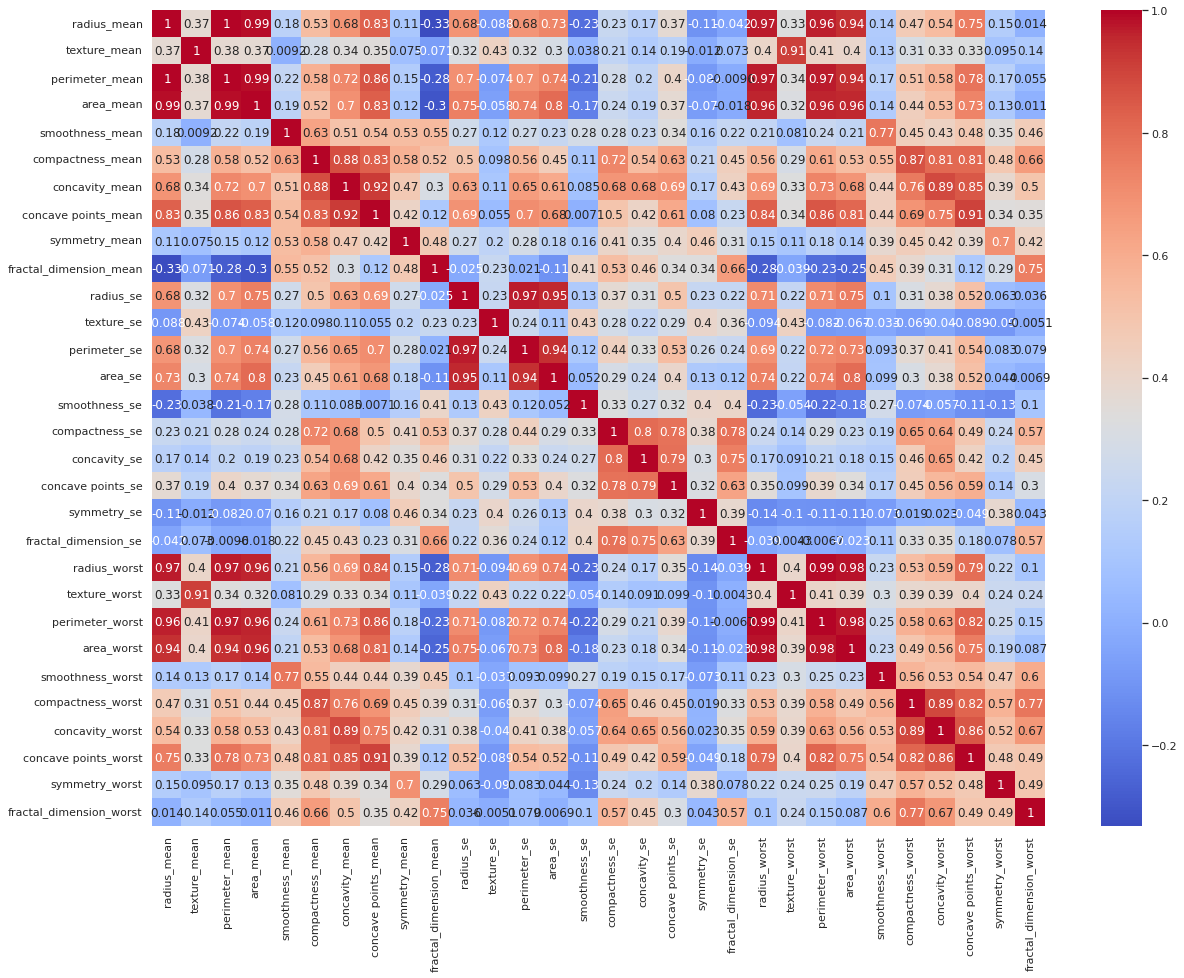

In [26]:
#Check data shape
print("Shape of data: ",data.shape)
#Check each data type of columns and missing values
print("Data type of columns and missing values")
data.info()
#Summary statistics
print("Summary statistics")
data.describe().transpose()
#For each group
print("Mean of variables per diagnosis")
print(data.groupby('diagnosis').mean().transpose())
print("Distribution of cases per diagnosis")
print(data.groupby("diagnosis").size())
#Correlation matrix
print("Heatmap of correlation")
corrMatrix = data.corr()
#Makes the plot bigger
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corrMatrix,annot=True,cmap='coolwarm')
## High linear correlation (over .7)
#'radius_mean
# 'radius_mean' and 'area_mean'
# 'radius_mean' and 'perimeter_mean'
# 'radius_mean and ' concave points_mean'
# 'radius_mean' and 'area_se'
# 'radius_mean' and 'radius_worst'
# 'radius_mean' and 'perimeter_worst'
# 'radius_mean' and 'area_worst'
# 'radius_mean' and 'cancave points_worst'
#'texture_mean
# 'texture_mean' and 'texture_worst'
#'perimeter_mean
# 'perimeter_mean' and 'area_mean'
#

In [27]:
#Features with high correlation
print("Features with high correlation")
high_correlation =corrMatrix.abs()
high_correlation_unstack=high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort[high_correlation_sort<1].head(15))

Features with high correlation
perimeter_mean   radius_mean        0.997984
radius_mean      perimeter_mean     0.997984
perimeter_worst  radius_worst       0.994106
radius_worst     perimeter_worst    0.994106
area_mean        radius_mean        0.986661
radius_mean      area_mean          0.986661
perimeter_mean   area_mean          0.986029
area_mean        perimeter_mean     0.986029
radius_worst     area_worst         0.983575
area_worst       radius_worst       0.983575
                 perimeter_worst    0.977175
perimeter_worst  area_worst         0.977175
perimeter_se     radius_se          0.973322
radius_se        perimeter_se       0.973322
radius_worst     perimeter_mean     0.969895
dtype: float64


## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(318, 30) (80, 30)
(318,) (80,)


# Task 2

## Use Random Forest Machine Learning Model for prediction

In [29]:
#random forest model creation
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train,y_train)

rfc_predict = rfc.predict(X_test)
print("10 first predictions of test data set")
rfc_predict[:10]

10 first predictions of test data set


array([1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

## Evaluate the model using Accuracy Score

In [30]:
print(accuracy_score(y_test, rfc_predict))

0.9625


# Task 3: Explaining the model with SHAP and Lime.

##  Use a SHAP Explainer to derive SHAP Values for the random forest ml model.

In [31]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rfc)

# finding out the shap values using the explainer
#shap_values = explainer(X_test)
shap_values = explainer.shap_values(X_test)


# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)
#In our case, classification problem, the shap_values is a list of arrays and the length of the list is equal to the number of classes 2 (benign and malignant).
#This is true for the expected_values also. Besides, we should choose which label we are trying to explain and use the corresponding shap_value and expected_value in further plots.
#Depending on the prediction of an instance, we can choose the corresponding SHAP values and plot them as shown below.
print('Expected Value for malignant diagnosis:', explainer.expected_value[1])
#displaying the first 5 rows of the shap values table of malignant
display(pd.DataFrame(shap_values[1]).head(5))

Expected Value: [0.65644654 0.34355346]
Expected Value for malignant diagnosis: 0.3435534591194968


0         1         2         3         4         5         6   \
0 -0.005338  0.028790 -0.004204 -0.000238 -0.001617  0.008663  0.060251   
1 -0.017259 -0.007295 -0.027345 -0.027283  0.001164 -0.004448 -0.013388   
2 -0.018498  0.000563 -0.025672 -0.039763  0.000714 -0.002796 -0.010519   
3 -0.016467 -0.014358 -0.026376 -0.025913 -0.002230 -0.004221 -0.012155   
4 -0.015138 -0.009182 -0.024750 -0.024866 -0.002922 -0.004360 -0.012256   

         7         8         9   ...        20        21        22        23  \
0  0.017267  0.001816 -0.001347  ... -0.014834  0.042108  0.104193 -0.015975   
1 -0.019186 -0.001248  0.000446  ... -0.042833  0.001314 -0.058209 -0.054538   
2 -0.015239 -0.001138 -0.000746  ...  0.114893  0.023804  0.133933  0.136463   
3 -0.018568 -0.000291 -0.000288  ... -0.036150 -0.015846 -0.054819 -0.050498   
4 -0.015886 -0.000256 -0.000804  ... -0.034406 -0.012416 -0.056267 -0.045923   

         24        25        26        27        28        29  
0  0.020314  0.036909  0.053302  0.092716  0.019780  0.002622  
1  0.000973 -0.004142 -0.013172 -0.034872 -0.000183 -0.001728  
2  0.013032 -0.002119  0.004731 -0.003994 -0.001617 -0.000367  
3 -0.006379 -0.003025 -0.010674 -0.027159 -0.001595 -0.002030  
4 -0.009053 -0.003645 -0.012025 -0.030571  0.001269 -0.002853  

[5 rows x 30 columns]

This returns a matrix of SHAP values (# samples, # features). Each row sums to the difference between the model output for that sample and the expected value of the model output (which is stored as expected_value attribute of the explainer). 

Typically this difference helps us in explaining why the model is inclined on predicting a specific class outcome. You'll see shap_values being used multiple times now. 

Also, the Expected Value: `0.35 approx` being displayed above will be used as the **base value** throughout all the visualizations below. As the result of `1` or malignant

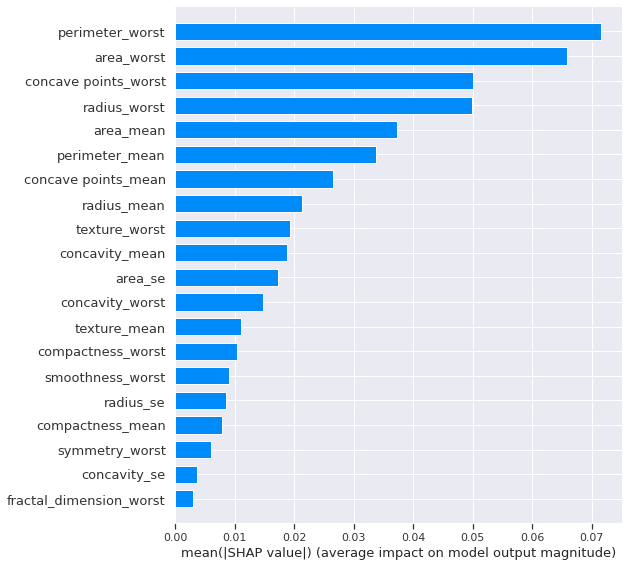

In [32]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test.values, plot_type="bar", feature_names = X_test.columns)

-> radius_worst, area_worst and concave points_worst are the most important features in the mean SHAP value or impact on model output magnitude

-> symmetry_worst, smoothness_mean and fractal_dimension_worst are the less important features in the mean SHAP value or impact on model output magnitude

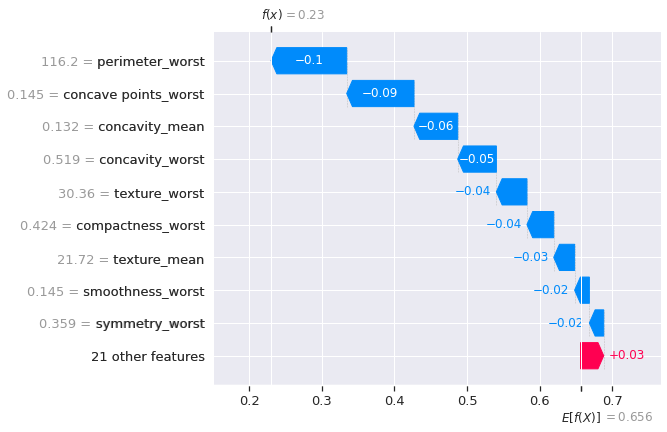

None

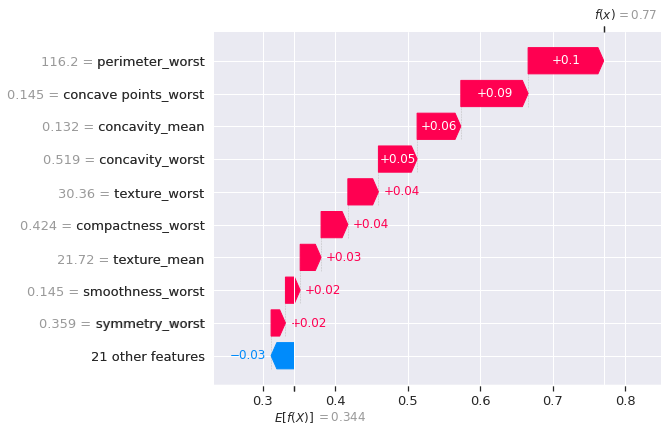

None

In [33]:
row=0
for which_class in np.unique(y):
    display(shap.waterfall_plot(shap.Explanation(values=shap_values[int(which_class)][row], base_values=explainer.expected_value[int(which_class)], data=X_test.iloc[row],feature_names=X_test.columns.tolist())))

First plot
1. f(x) is the model predict_proba value: 0.29 approx
2. E[f(x)] is the base value: 0.657 approx
3. On the left are the features value and on the arrows the feature contribution to the prediction.
4. Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction

Second plot
1. f(x) is the model predict_proba value: 0.71 approx
2. E[f(x)] is the base value: 0.343 approx

In [34]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

## Write your inferences from the generated plot.



The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can hover over the graph to understand the following observations

->The blue bars shos how much a particular feature **decreases** the value of the prediction.

->The red bards shows how much a particular feature **increases** the value of the prediction

We can see all the features are displayed in blue i.e all features contributed in making the outcome as `0` or benign.  

We can see all the features are displayed in red i.e all features contributed in making the outcome as `1` or malignant.  

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [35]:
shap.initjs()
shap_values_first_row = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[1], shap_values_first_row[1], X_test.iloc[0])

## Write your inferences from the generated plot.

This force plot above depicts the weight of each feature contribution by the model centered around the baseline SHAP value of 0.3457 which either increase or decrease the prediction.

In the above plot f(x) is the prediction after considering all the features E[f(x)] is the mean prediction. 

->The blue bars shos how much a particular feature **decreases** the value of the prediction.

->The red bards shows how much a particular feature **increases** the value of the prediction


So, the variables:

'perimeter_worst'

'concave points_mean'

'concavity_mean' 

'concave points_worst'

Are the main influence for a positive outcome (higher)

and the variables:

'radius_worst'

'area_se'

Are the main influence for a benign outcome (lower)

1º. The model predict prob value: 0.71

2º. The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = 0.3457.

3º The bigger the arrow, the bigger the impact of the feature on the ouput. The amount of decrease or increase in the impact can be seen on the x-axis.


Therefore the first test sample will be predicted as **`1` (benign)**

We are going to check the real value with the predicted one.

In [36]:
print("Prediction: ", rfc_predict[0])
print("Real value: ",y_test.iloc[0])

Prediction:  1
Real value:  1


Here we can check that the outcome of the model is the same as the test data. 

# Task 5

## Plot a SHAP force plot for all the rows of the data

In [37]:
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(rfc)
# obtain shap values for all data
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test) 

## Write your inferences from the generated plot.

SHAP gives a nice reasoning above showing which features were the most influential in the model, taking the correct decision of predicting the if cancer is malignant or benign.

The explanation shows features each contributing to push the model output from the base value of outcome `1` malignant.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

The default visualization(sample order by similarity i.e putting the people having the most similar features together) shows some interesting model prediction pattern decisions. You can check the graph to understand the following observations:

    We can see all the features are displayed in red till n=30 i.e all features contributed in making the outcome malignant due to the area_worst, radius_worst, perimeter_worst.

    Most of the next 40+ samples (till n=75) probably is benign.

    The last instances there are a high variances despite the blue variables.
    
Definitely interesting how we can find out patterns which lead to the model making specific decisions and being able to provide explanations for them.



# Task 6

## Plot a SHAP summary plot using all the features in the data

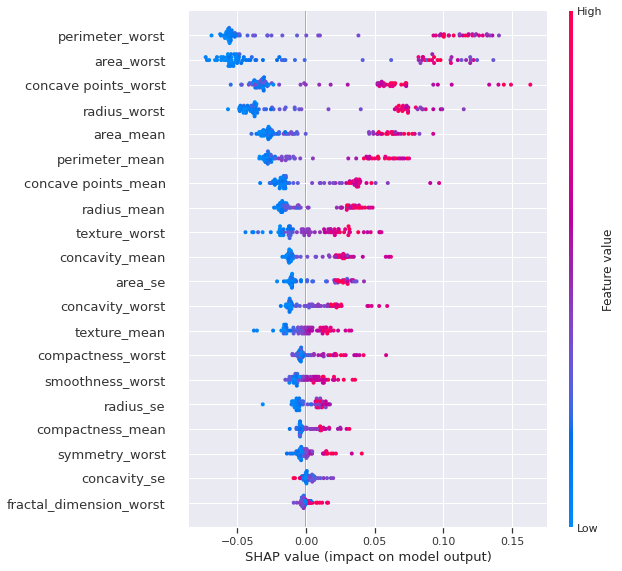

In [38]:
#shap summary for benign
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1],X_test)

## Write your inferences from the generated plot.

The red color depicts features having positive correlation (more the variable more the outcome) on the model and the blue color depicts features which have negative correlation (more the variable less the outcome) on our model.

The variables are sorted decreasing by influence in the model.

That is to say area_worst ,radio_worst,concave point_mean, perimeter_worst,area_mean and radius_mean increase the model prediction for output `1` (malignant).

We can see SHAP value impact in the concave points_worst where the values are too disperse (over 0.15 for the highest values of the variables)

Also this variables are the most importants for the outcome. A higher level of this variables has a high and a positive outcome to the outcome `1` (malignant)

# Task 7

##Plot a SHAP dependecne plot using all features in the data

In this section we will use the shap_values[1] which is linked to the output `1` or malignant for a better understanding.

the **Expected Value: 0.34569182** being displayed above will be used as the **base value** throughout all the visualizations below.

********************************************************************************************************************************
Shap equals 1
********************************************************************************************************************************
Plot number:  1


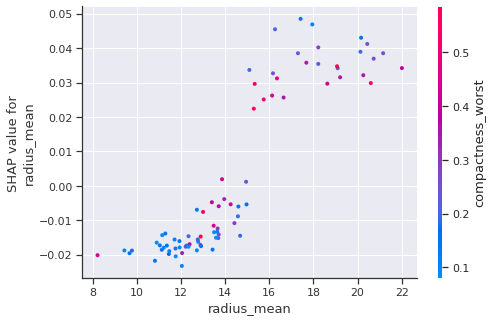

Plot number:  2


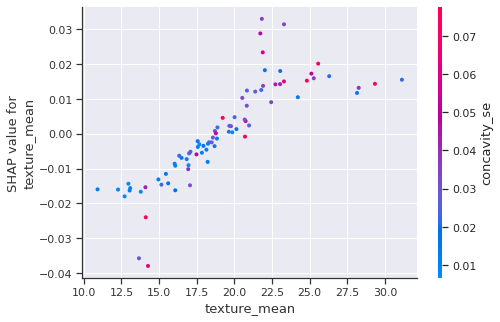

Plot number:  3


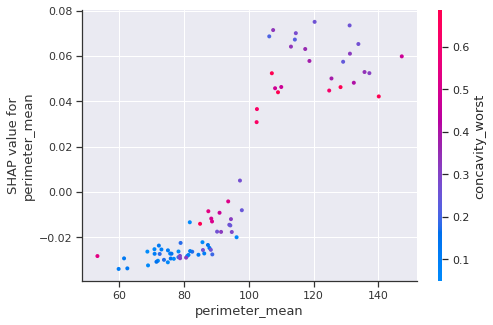

Plot number:  4


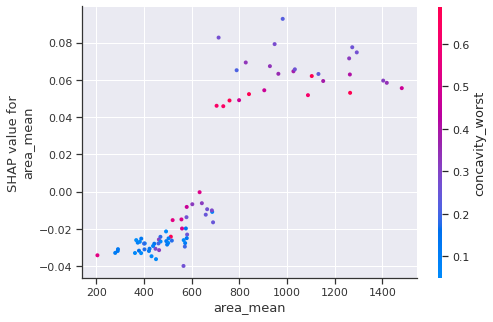

Plot number:  5


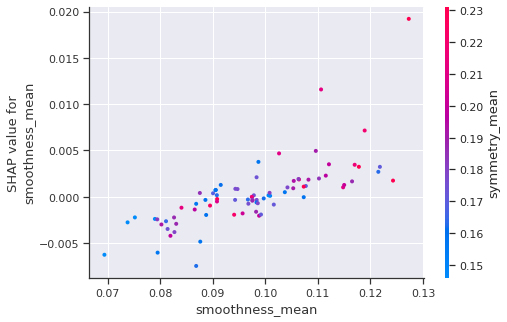

Plot number:  6


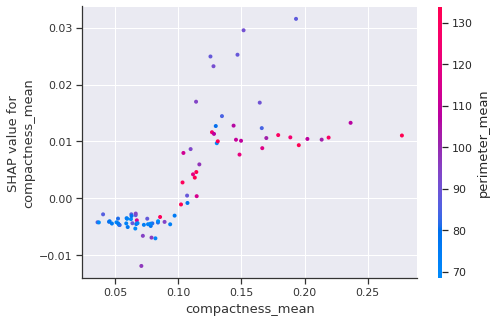

Plot number:  7


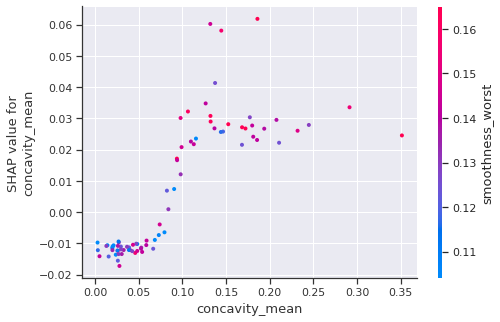

Plot number:  8


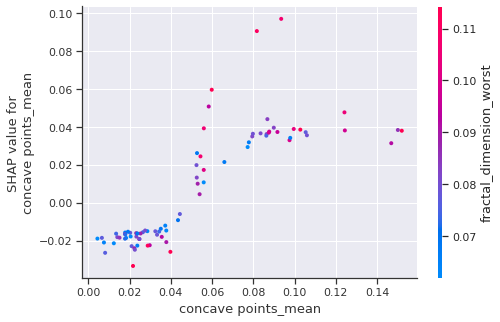

Plot number:  9


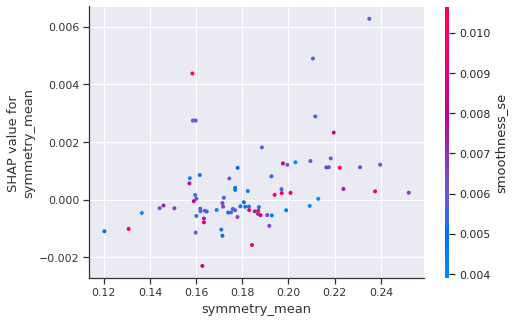

Plot number:  10


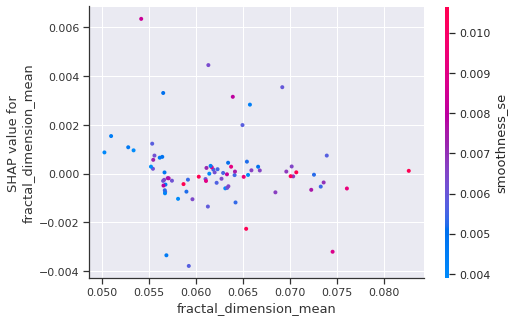

Plot number:  11


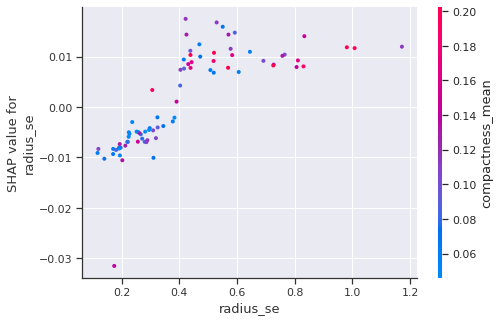

Plot number:  12


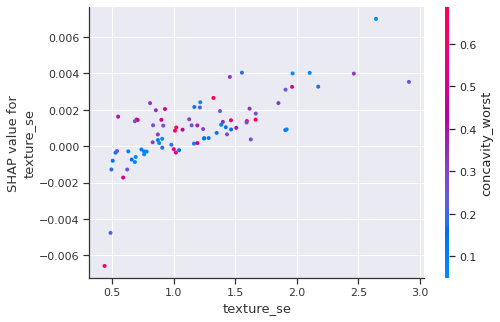

Plot number:  13


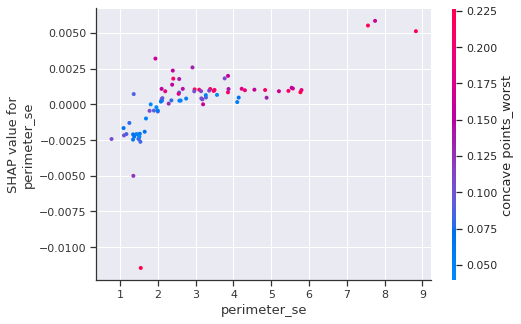

Plot number:  14


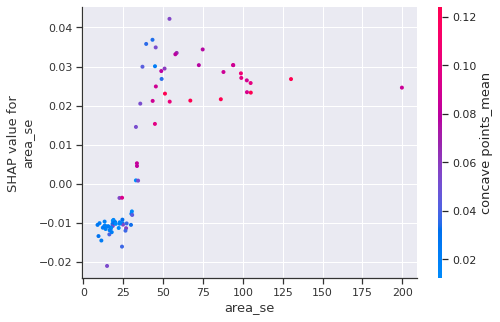

Plot number:  15


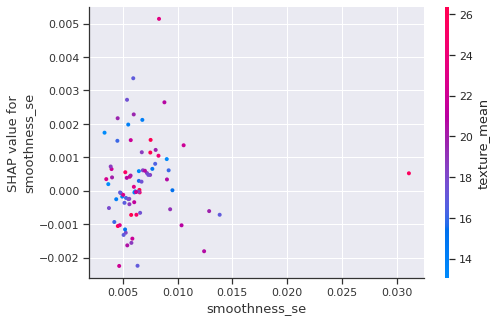

Plot number:  16


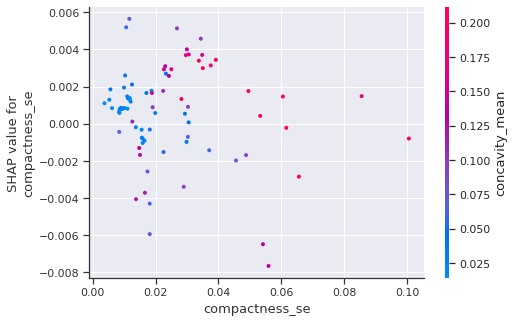

Plot number:  17


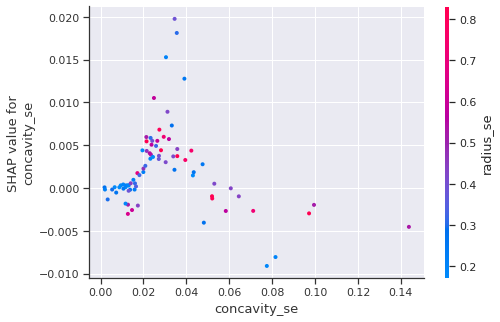

Plot number:  18


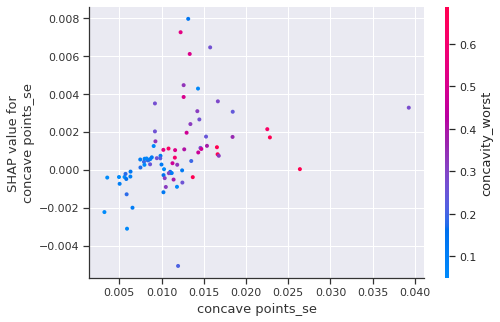

Plot number:  19


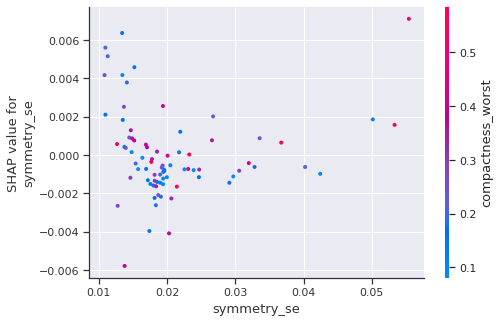

Plot number:  20


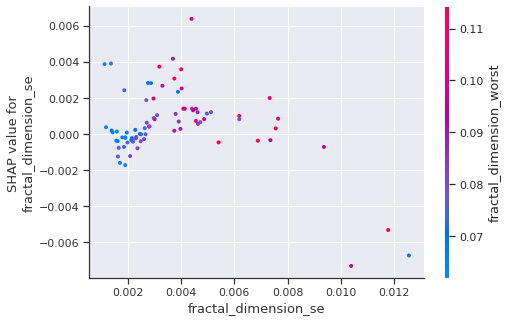

Plot number:  21


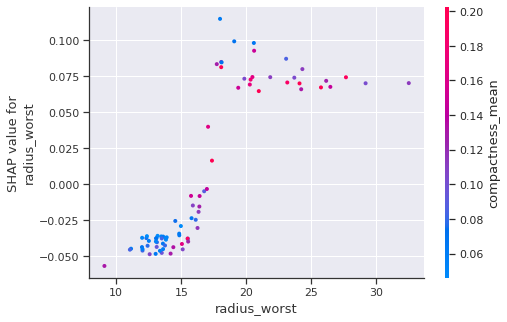

Plot number:  22


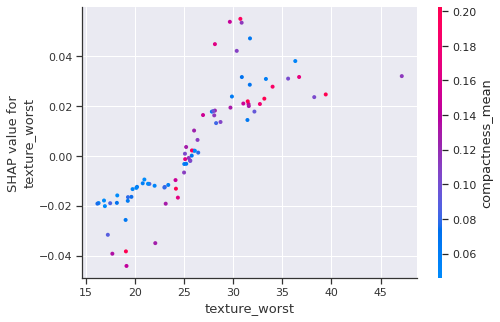

Plot number:  23


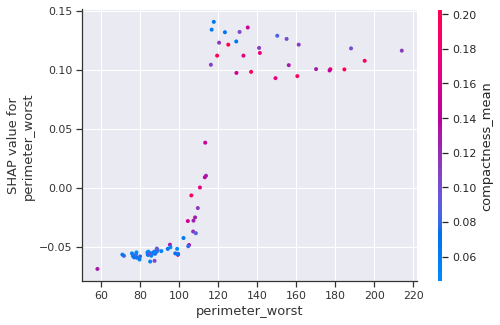

Plot number:  24


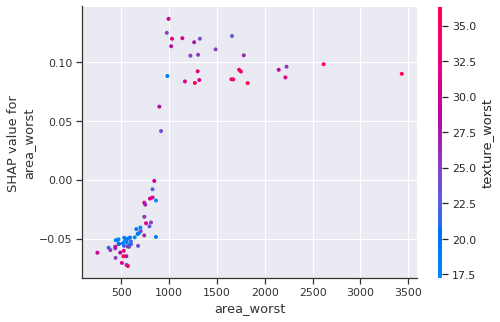

Plot number:  25


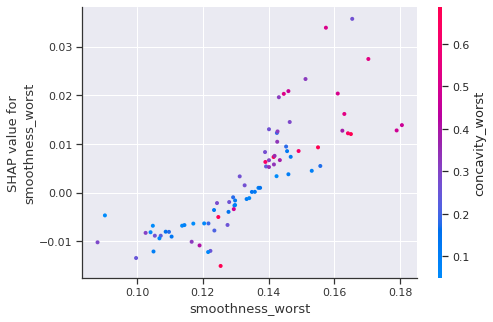

Plot number:  26


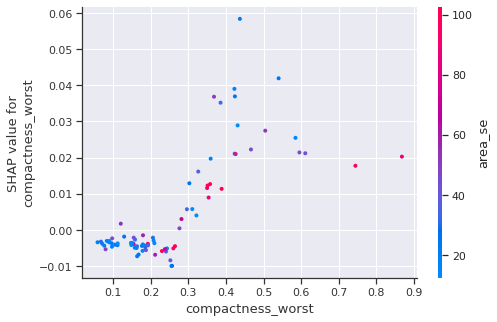

Plot number:  27


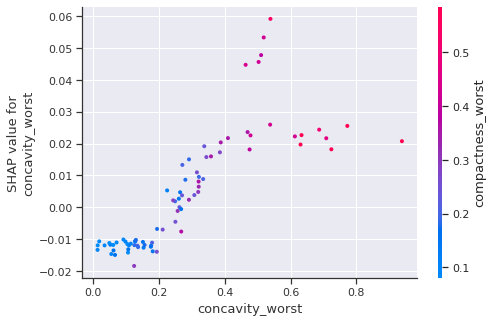

Plot number:  28


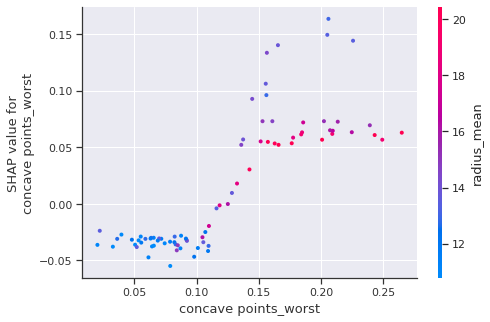

Plot number:  29


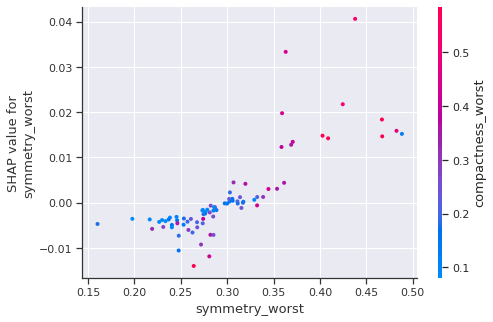

Plot number:  30


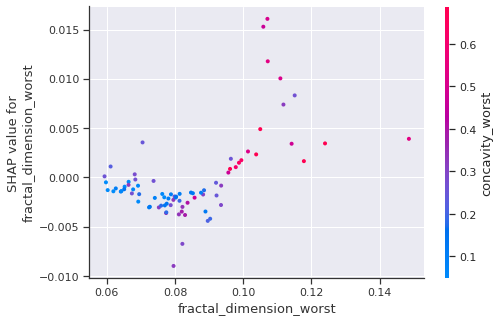

In [39]:
#Shap = 1
print("********************************************************************************************************************************")
print("Shap equals 1")
print("********************************************************************************************************************************")
for i in range(X_test.shape[1]):
  print("Plot number: ",i+1)
  shap.dependence_plot(i,shap_values[1],X_test)

## Write your inferences from the generated plot.

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model.<p> It tells whether the relationship between the target and a feature is linear, monotonic or more complex.<p>
The function automatically includes another variable that your chosen variable interacts most with.<p>

There are a total of 30 plots. We are going to take 4 of them to comment:

Plot number 1. radius_mean~compactness_worst:

    SHAP values are from -0.02 to 0.06 approx.
    Value of compactness_worst and radius_mean are positive correlated to the SHAP value for outcome 1 (malignant).


Plot number 3. texture_mean~concavity_worst:

    SHAP values are from -0.02 to 0.08 approx.
    Value of concavity_worst and texture_mean are postive correlated (almos linear) to the SHAP value for outcome 1 (malignant).

Plot number 21. radius_worst~compactness_mean:

    SHAP values are from -0.05 to 0.1 approx.
    Value of radius_worst and compactness_mean are postive correlated to the SHAP value for outcome 1 (malignant).

Plot number 23. perimeter_worst~compactness_mean:

    This plot is quite similar to plot number 1.
    SHAP values are from -0.05 to 0.15 approx.
    Value of radius_worst and concavity_mean are postive correlated to the SHAP value for outcome 1 (malignant).

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

## Summary plot

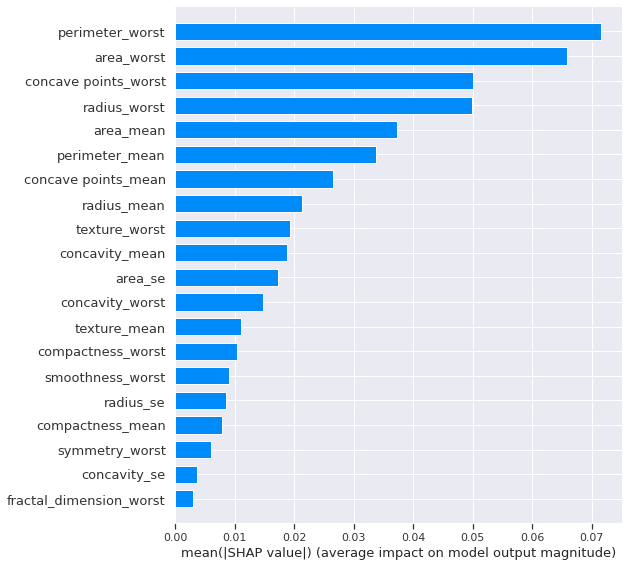

In [40]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

    ->radius_worst, perimeter_worst and area_worst are the main variables to the model.

    <-smoothness_mean, symmetry_worst and texture_se are the less influence variables to the model

## Decison plot features

Refer to the decision plot of the dataset. 

Note: This plot isn't informative by itself; we use it only to illustrate the primary concepts.

->The x-axis represents the model's output. In this case, the units are log odds.

->The plot is centered on the x-axis at explainer.expected_value. All SHAP values are relative to the model's expected value like a linear model's effects are relative to the intercept.

->The y-axis lists the model's features. By default, the features are ordered by descending importance. The importance is calculated over the observations plotted. This is usually different than the importance ordering for the entire dataset. In addition to feature importance ordering, the decision plot also supports hierarchical cluster feature ordering and user-defined feature ordering.

->Each observation's prediction is represented by a colored line. At the top of the plot, each line strikes the x-axis at its corresponding observation's predicted value. This value determines the color of the line on a spectrum.

->Moving from the bottom of the plot to the top, SHAP values for each feature are added to the model's base value. This shows how each feature contributes to the overall prediction.

->At the bottom of the plot, the observations converge at explainer.expected_value.

->the decision plot supports link='logit' to transform log odds to probabilities.


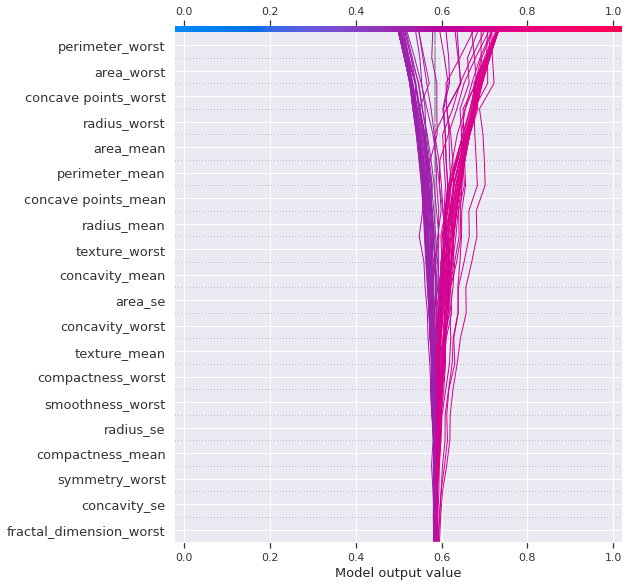

In [41]:
shap.initjs()
shap.decision_plot(explainer.expected_value[1],shap_values[1],X_test,link='logit')

In the plot above we have the probabilities for greater values of

- area_worst

- radius_worst

- perimeter_worst

We get more probability to be `1` (malignant)

## Study the missclassified data

In [42]:
#Get the test real values as np.array
y_test_1 = np.asarray(y_test)
#rfc_predict(X_test)
#Predict the test
y_pred = rfc.predict(X_test)
#misclassified is the index of the mistakes
misclassified = np.where(y_test_1 != y_pred)
misclassified

misclassified_np=np.array(misclassified)
#misclassified_np[0][:]
#X_test.iloc[misclassified_np[0][:],:]

Expected Value: [0.65644654 0.34355346]
Expected Value for malignant diagnosis: 0.3435534591194968


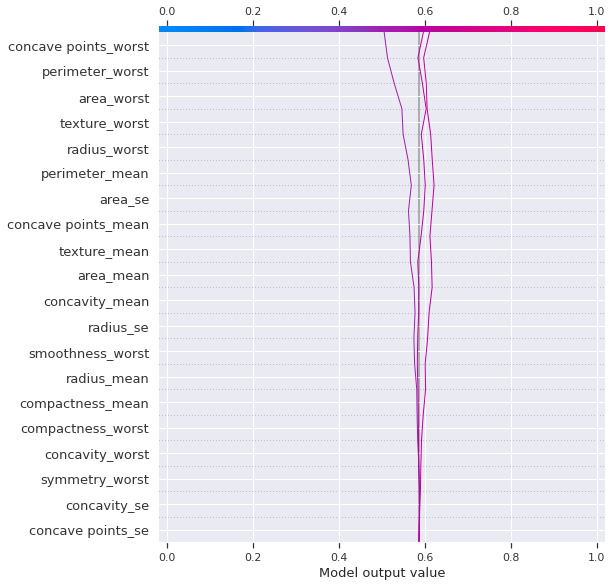

Real values:  [1 1 1]
Estimated values:  [0 0 0]


In [43]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rfc)

# finding out the shap values using the explainer of the mistakes
#
shap_values = explainer.shap_values(X_test.iloc[misclassified_np[0][:],:])


# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)
#In our case, classification problem, the shap_values is a list of arrays and the length of the list is equal to the number of classes 2 (benign and malignant).
#This is true for the expected_values also. Besides, we should choose which label we are trying to explain and use the corresponding shap_value and expected_value in further plots.
#Depending on the prediction of an instance, we can choose the corresponding SHAP values and plot them as shown below.
print('Expected Value for malignant diagnosis:', explainer.expected_value[1])

#shap.decision_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[misclassified_np[0][:],:], link='logit', highlight=misclassified_np)
shap.decision_plot(explainer.expected_value[1],shap_values[1],X,link='logit')
print("Real values: ",y_test_1[misclassified_np[0][:]])
print("Estimated values: ",y_pred[misclassified_np[0][:]])


Real values are `1` or malignant however the model estimated as `0` or benignant
This results  

In [44]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

In [45]:
plots = []
for i in range(misclassified_np.size):
  shap.initjs()
  shap_values_first_row = explainer.shap_values(X_test.iloc[misclassified_np[0][i],:])
  display(shap.force_plot(explainer.expected_value[1], shap_values_first_row[1], X_test.iloc[misclassified_np[0][i],:]))
#plots[:]
  

The base values are 0.34 aprox and the f(x)=0,0.40,0.39 and 0.50 approx and the variables

'perimeter_worst' 

'radius_worst'

'area_worst'

Are the main variables wich push the variables to be near outcome `0` or benignant.
